# Analysis of Cylists' Performance & Statistics

In [1]:
# import all necessary libraries for data manipulation and analysis
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
from scipy import stats
import seaborn as sns

In [2]:
# read data retrieved from Strava
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


In [3]:
# read data retrieved form GoldenCheetah
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


In [4]:
# merge of two data sets
merged = cheetah.join(strava, how = 'inner')
merged.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
2018-01-27 19:39:49+00:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride
2018-01-27 20:01:32+00:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race
2018-01-31 21:13:34+00:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride
2018-02-05 21:06:42+00:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride
2018-02-07 06:59:05+00:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride


## Removal of rides with no measued power

In [5]:
# remove rides where power meter wasn't used (where device_watts is False)
merged = merged[merged.device_watts != False]
merged['device_watts'].head()

2018-01-27 19:39:49+00:00    True
2018-01-27 20:01:32+00:00    True
2018-02-05 21:06:42+00:00    True
2018-02-07 06:59:05+00:00    True
2018-02-09 19:18:03+00:00    True
Name: device_watts, dtype: object

## Histograms of Various Variables

### Explanation of Histograms

* The histogram of distance and moving time seems to have a bimodal distribution.
* The histogram of TTS is right skewed.
* The histrogram of average speed has a normal distribution, however this dataset has outliers which are need to taken into account. 


C:\Users\renat\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0, 0.5, 'Frequency')

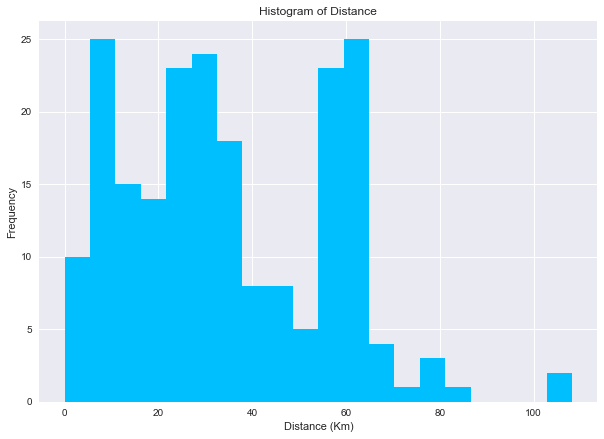

In [6]:
# histogram of distance
plt.figure(figsize=(10, 7))
merged['distance'].hist(normed = 0, histtype = 'stepfilled', bins = 20, color = 'deepskyblue')
plt.title('Histogram of Distance')
plt.xlabel('Distance (Km)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

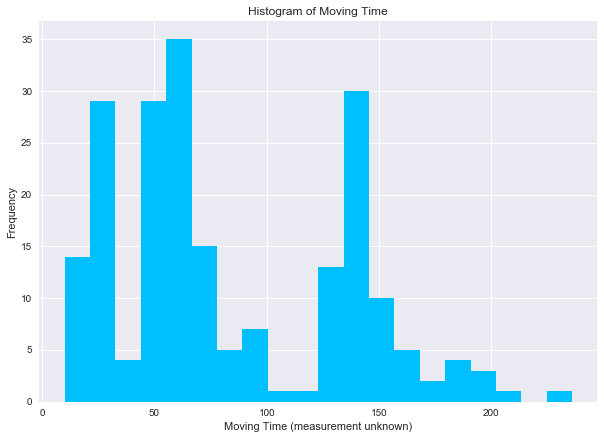

In [7]:
# histogram of moving_time
plt.figure(figsize=(10, 7))
merged['moving_time'].hist(normed = 0, histtype = 'stepfilled', bins = 20, color = 'deepskyblue')
plt.title('Histogram of Moving Time')
plt.xlabel('Moving Time (measurement unknown)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

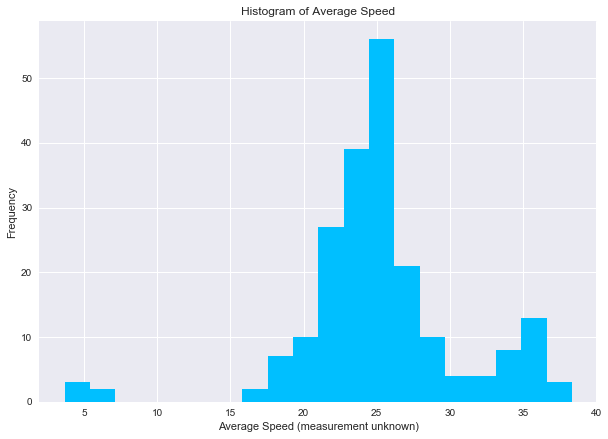

In [8]:
# histogram of Average Speed
plt.figure(figsize=(10, 7))
merged['Average Speed'].hist(normed = 0, histtype = 'stepfilled', bins = 20, color = 'deepskyblue')
plt.title('Histogram of Average Speed')
plt.xlabel('Average Speed (measurement unknown)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

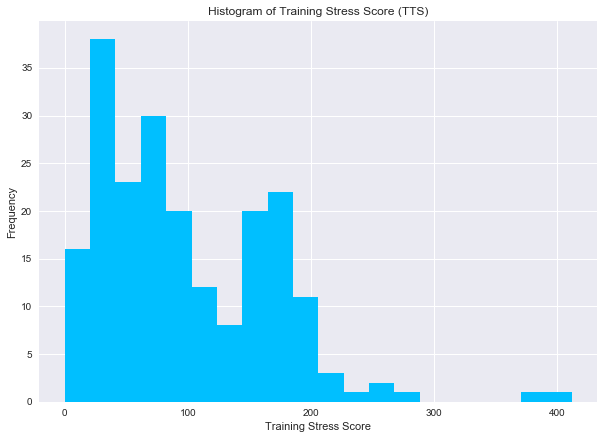

In [9]:
# histogram of TSS (Training Stress Score)
plt.figure(figsize=(10, 7))
merged['TSS'].hist(normed = 0, histtype = 'stepfilled', bins = 20, color = 'deepskyblue')
plt.title('Histogram of Training Stress Score (TTS)')
plt.xlabel('Training Stress Score')
plt.ylabel('Frequency')

## Finding Correlation Between Variables

In [10]:
# selection of columns in interest & create correlation matrix
selected = merged[['distance', 'moving_time', 'Average Speed','average_heartrate', 'Average Power', 'Elevation Gain', 'NP', 'TSS']]
selected.corr()

,distance,moving_time,Average Speed,average_heartrate,Average Power,Elevation Gain,NP,TSS
distance,1.000000,0.939383,0.187363,0.114595,0.129199,0.805468,0.270703,0.922565
moving_time,0.939383,1.000000,-0.103484,-0.048611,-0.109838,0.813146,0.044431,0.871368
Average Speed,0.187363,-0.103484,1.000000,0.742388,0.814403,-0.016160,0.674857,0.134054
average_heartrate,0.114595,-0.048611,0.742388,1.000000,0.692413,0.071553,0.593091,0.113775
Average Power,0.129199,-0.109838,0.814403,0.692413,1.000000,-0.035987,0.844487,0.225290
Elevation Gain,0.805468,0.813146,-0.016160,0.071553,-0.035987,1.000000,0.229933,0.828928
NP,0.270703,0.044431,0.674857,0.593091,0.844487,0.229933,1.000000,0.432286
TSS,0.922565,0.871368,0.134054,0.113775,0.225290,0.828928,0.432286,1.000000


### Summary of correlation matrix

There are possible correlations between the following variables:

* distance & moving_time
* distance & elavation Gain
* distance & TSS
* moving_time & Elvation Gain
* moving_time & TSS
* Average Speed & average_heartrate
* Average speed & Average Power etc.

Values that are above or at around 0.70 are possible candidates for a linear relationship.


C:\Users\renat\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\renat\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


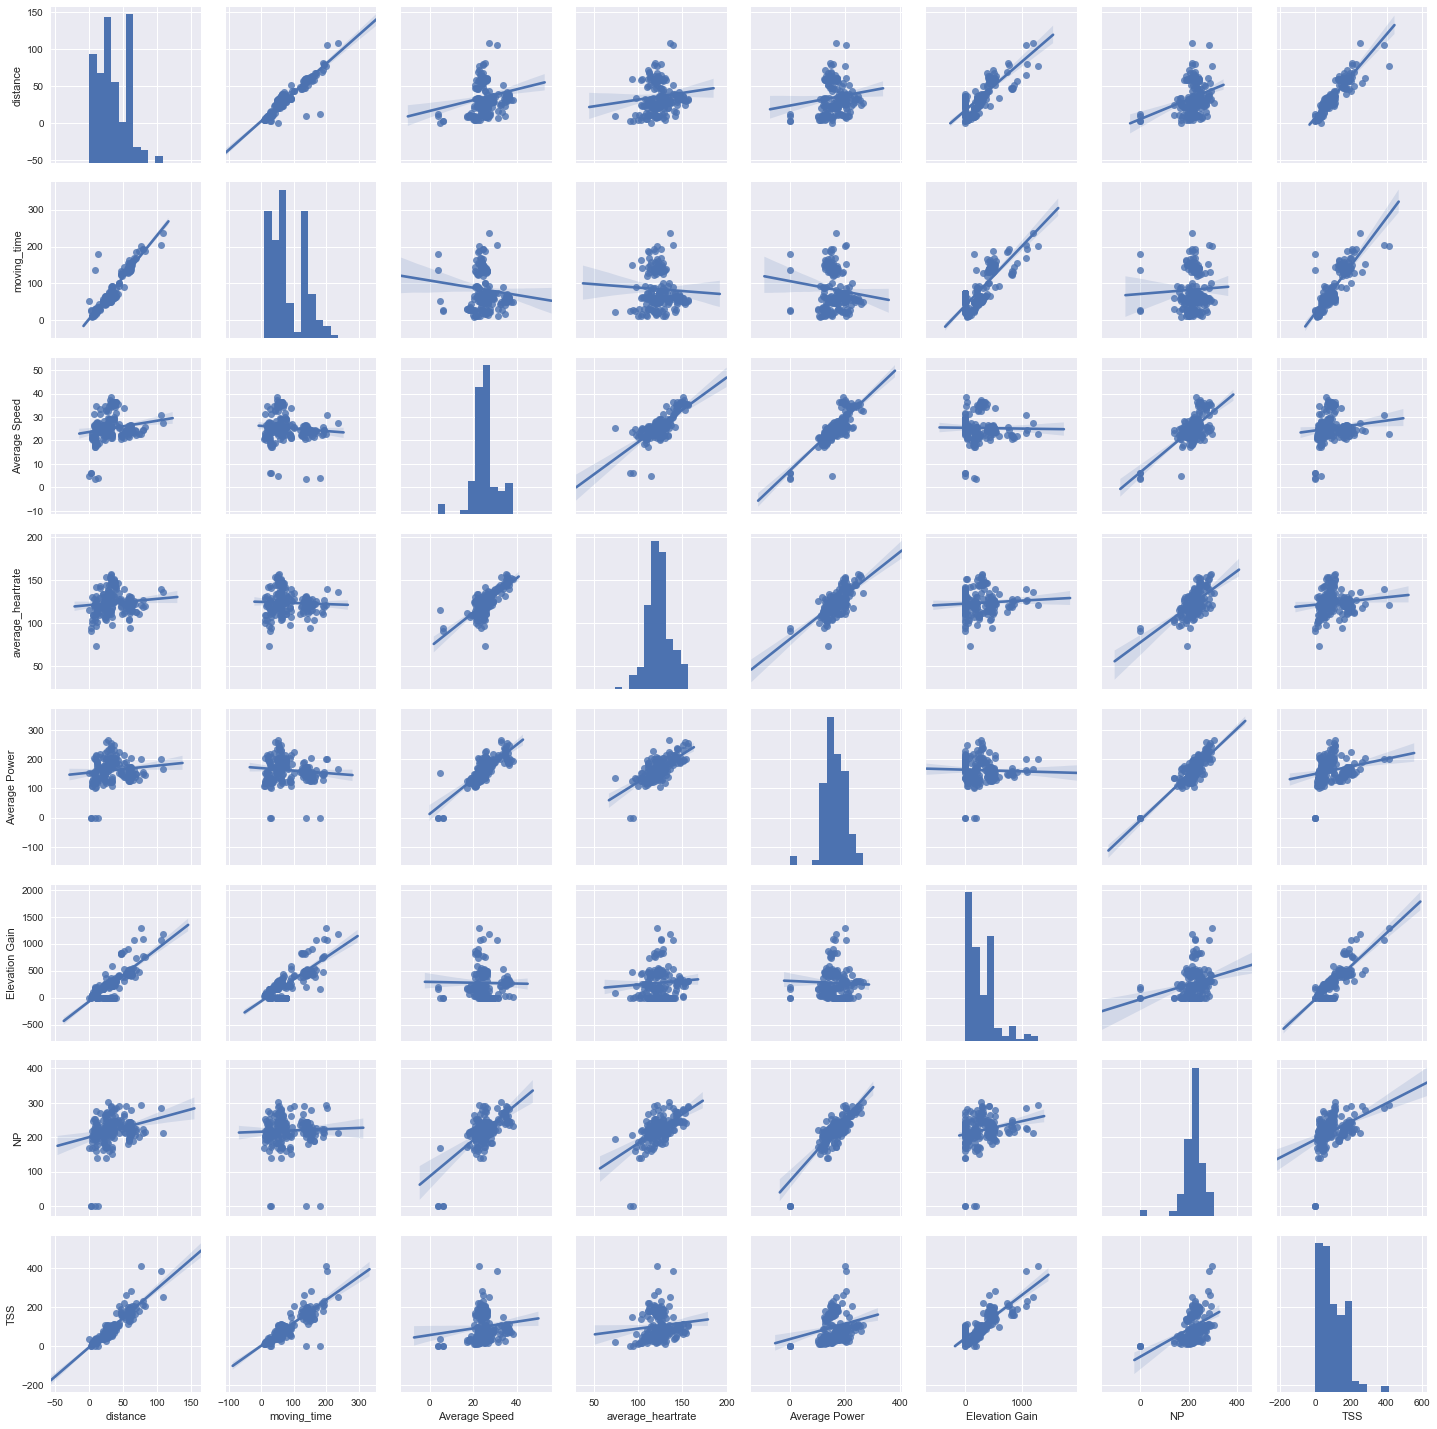

In [11]:
# scatterplot matrix for the variables in 'selected' list 
sns.pairplot(selected, kind='reg')

### Summary of Scatterplot Matrix

It shows that there is a possible relationship between the following variables:

* distance & moving_time
* distance & TSS
* Average Heart Rate & Average Power
* Average Power & NP


## Exploration of different bicycle workout types

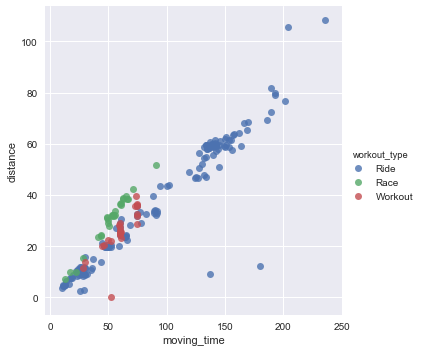

In [12]:
# scatter plot of distance and moving_time by workout type
sns.lmplot(x = 'moving_time', y = 'distance', data = merged, fit_reg = False, hue = 'workout_type', legend = True)

### Comments on the scatter plot

The scatter plot of distance and moving_time by workout type displays that 'Race' & 'Workout' types are tend to have shorter distances and moving times compared to 'ride' workout type. The green and red data points are centered around the left hand bottom corner. 

While the 'ride' workout type have several outliers which are need to be further examined to determine thier importance.


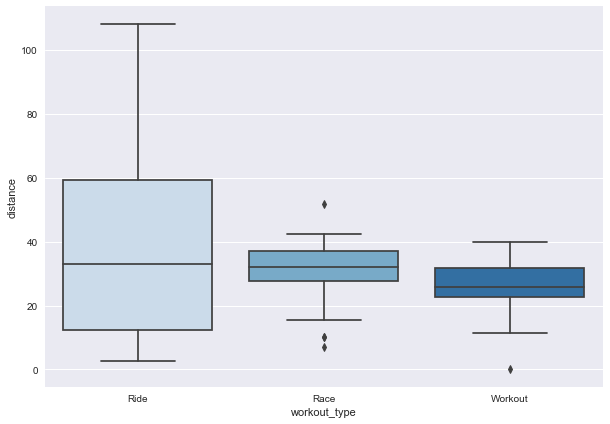

In [13]:
# comparative boxplot of distance by workout type
plt.figure(figsize=(10, 7))
sns.boxplot(x = merged['workout_type'], y = merged['distance'], palette = 'Blues')

### Comments on the comperative boxplot

The comparative boxplot makes it easy to compare the distribution of distance in the three workout types (Ride, Race, Workout). It can be observed that the range for 'Ride' is significantly greater compared to the other two types. Both 'Race' and 'Workout' types have outliers. While, all workout types have approximately the same median distance.

## Challange Questions

### What leads to more kudos?

* Greater kudos is received as distance increases. People feel that they achieved more if they ride bicycle for a longer distance.
* As Training Stress Score (TSS) increases, kudos increase as well. By completing a harder track, people think that they have achieved something big.
* Average temperature has nothing to do with kudos.
* People who cycle in race have a significantly higher median kudos compared to the other two workout types (Ride, Workout). (see comparative boxplots below)

C:\Users\renat\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\renat\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


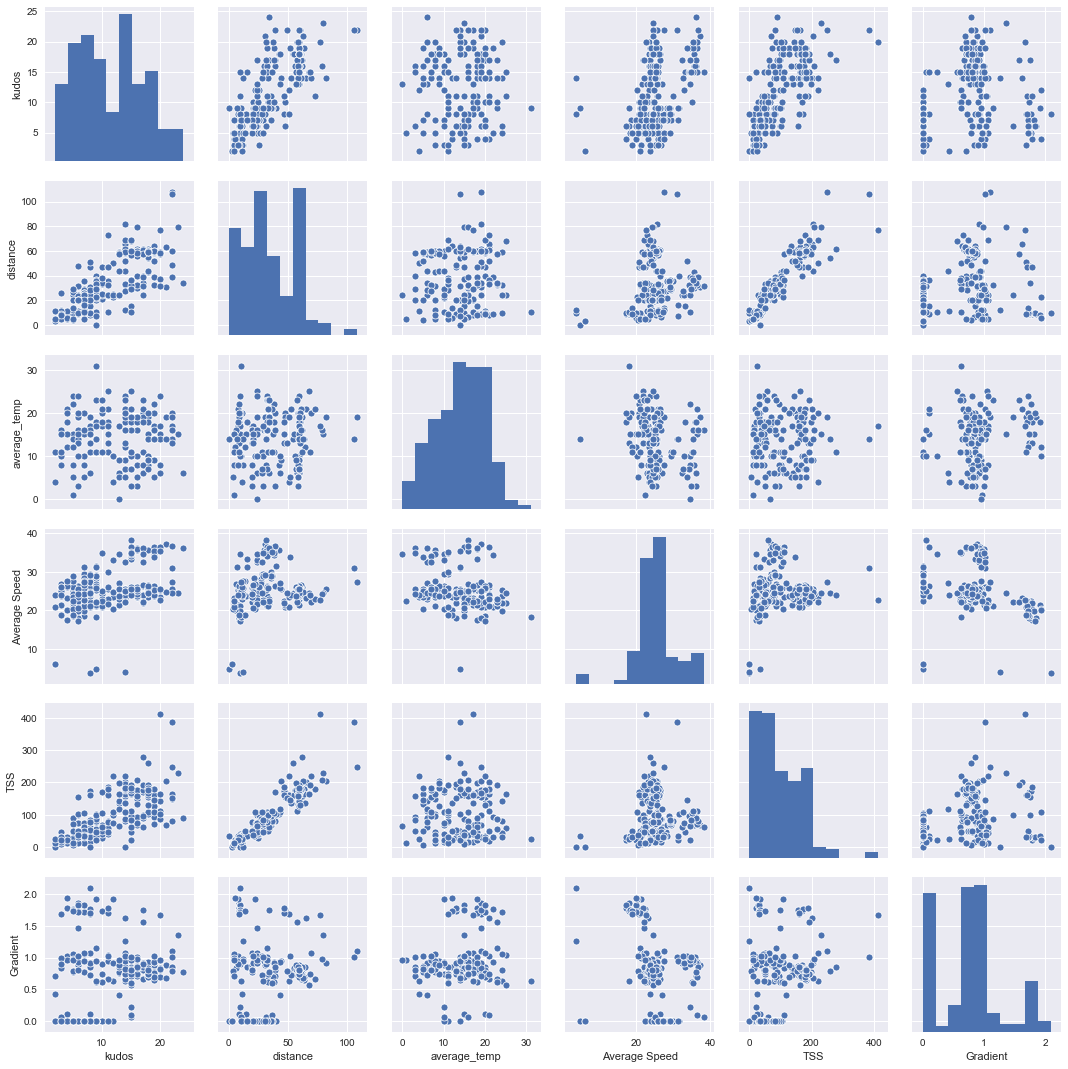

In [14]:
# scatterplot of kudos with different variables
kudos = merged[['kudos', 'distance', 'average_temp', 'Average Speed', 'TSS', 'Gradient']]
sns.pairplot(kudos)

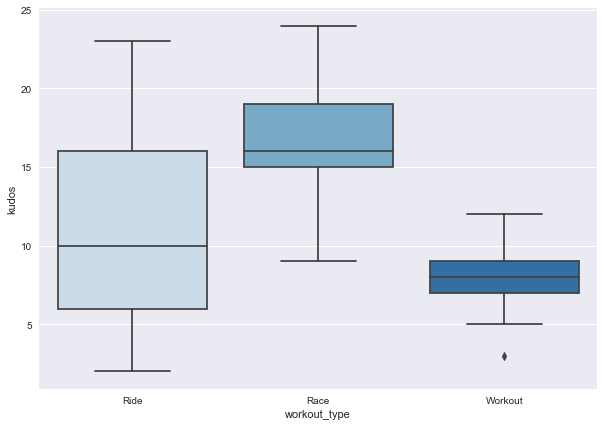

In [15]:
# comparative boxplots of kudos by workout types
plt.figure(figsize=(10, 7))
sns.boxplot(x = merged['workout_type'], y = merged['kudos'], palette = 'Blues')

# Energy Consumption of Appliances in Houses

Aim of this notebook is to explore predictors of appliances energy consumption in a house and find a best possible model that explains the most variation in the data.


In [16]:
# import all necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

## Exploration of Data

In [17]:
# read data
energy = pd.read_csv('data/energydata_complete.csv', index_col='date', parse_dates=True)
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


C:\Users\renat\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0, 0.5, 'Frequency')

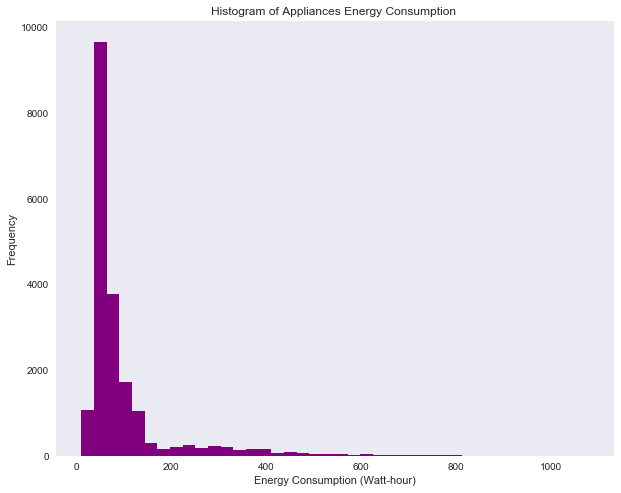

In [18]:
# histogram of appliances energy consumption
plt.figure(figsize=(10,8))
energy['Appliances'].hist(normed=0, histtype='stepfilled', bins=40, color='purple', grid=False)
plt.title('Histogram of Appliances Energy Consumption ')
plt.xlabel('Energy Consumption (Watt-hour)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

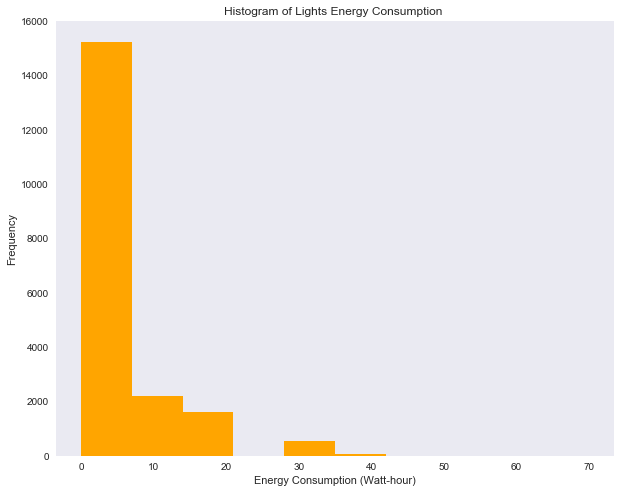

In [19]:
# histogram of lights energy consumption
plt.figure(figsize=(10,8))
energy['lights'].hist(normed=0, histtype='stepfilled', bins=10, color='orange', grid=False)
plt.title('Histogram of Lights Energy Consumption ')
plt.xlabel('Energy Consumption (Watt-hour)')
plt.ylabel('Frequency')

## Comments on Histograms

* The distribution of energy consumption for both appliances and lights are right skewed.
* The range of energy consumption (Wh) for appliances is far greater than for lights.

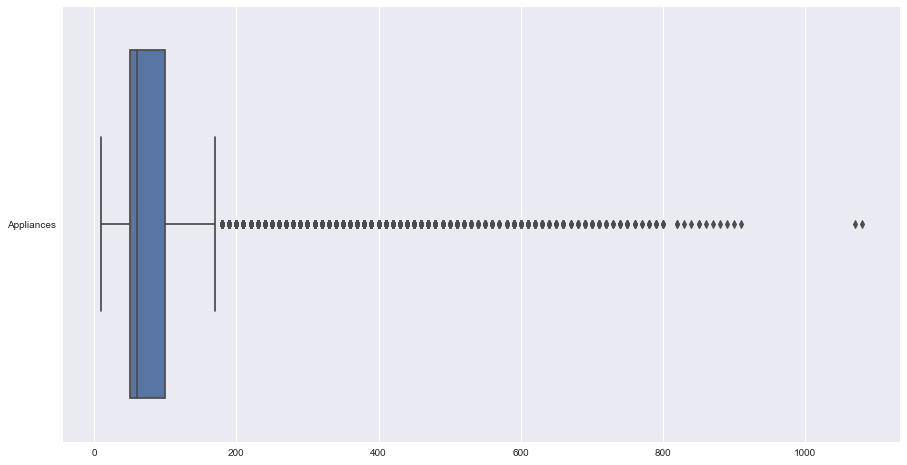

In [20]:
# boxplot of appliances
plt.figure(figsize=(15,8))
sns.boxplot(data=energy[['Appliances']], orient="h")

## Comments on the boxplot

* It has many outliers.
* The median energy consumption for appliances is about 90 Wh.
* Energy consumption of appliances is highly dispersed and skewed.

In [21]:
energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Comments on the means

* The mean energy consumtion (in Wh) for appliances is significantly greater (97.7) than for lights (3.8).
* The mean temperature (in Celcius) is very similar in all rooms, it ranges between 20 and 23.
* Similarly, the mean room humidity is approximately is the same across all rooms.
* The standard deviation for appliances is big, meaning the data vary a lot. 

In [22]:
energy.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

* There are no missing values.

C:\Users\renat\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


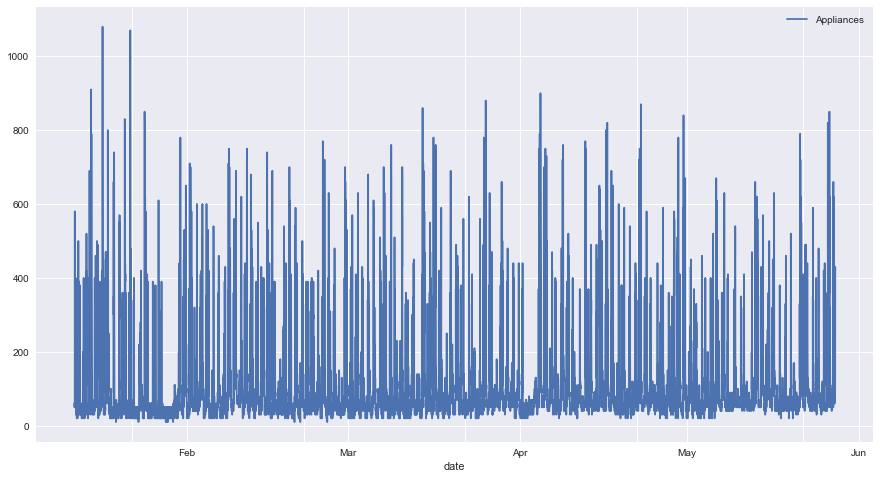

In [23]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(data=energy[['Appliances']])
fig.set(xticklabels=['', 'Feb', '', 'Mar', '', 'Apr', '', 'May', '', 'Jun']);

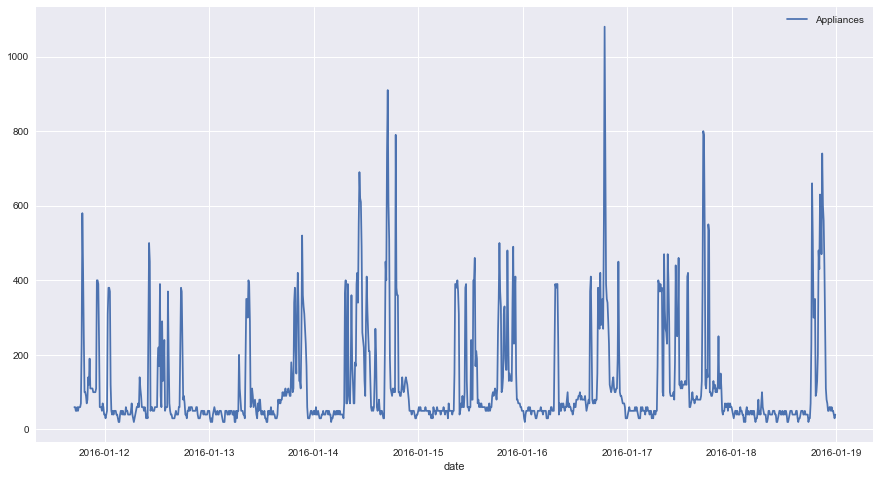

In [24]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(data=energy[['Appliances']].query('index < "2016-01-19 00:00:00"'))

## Comments on line plots

* High spikes occur throughout the given time period.
* The energy consumption of appliances has high variance.

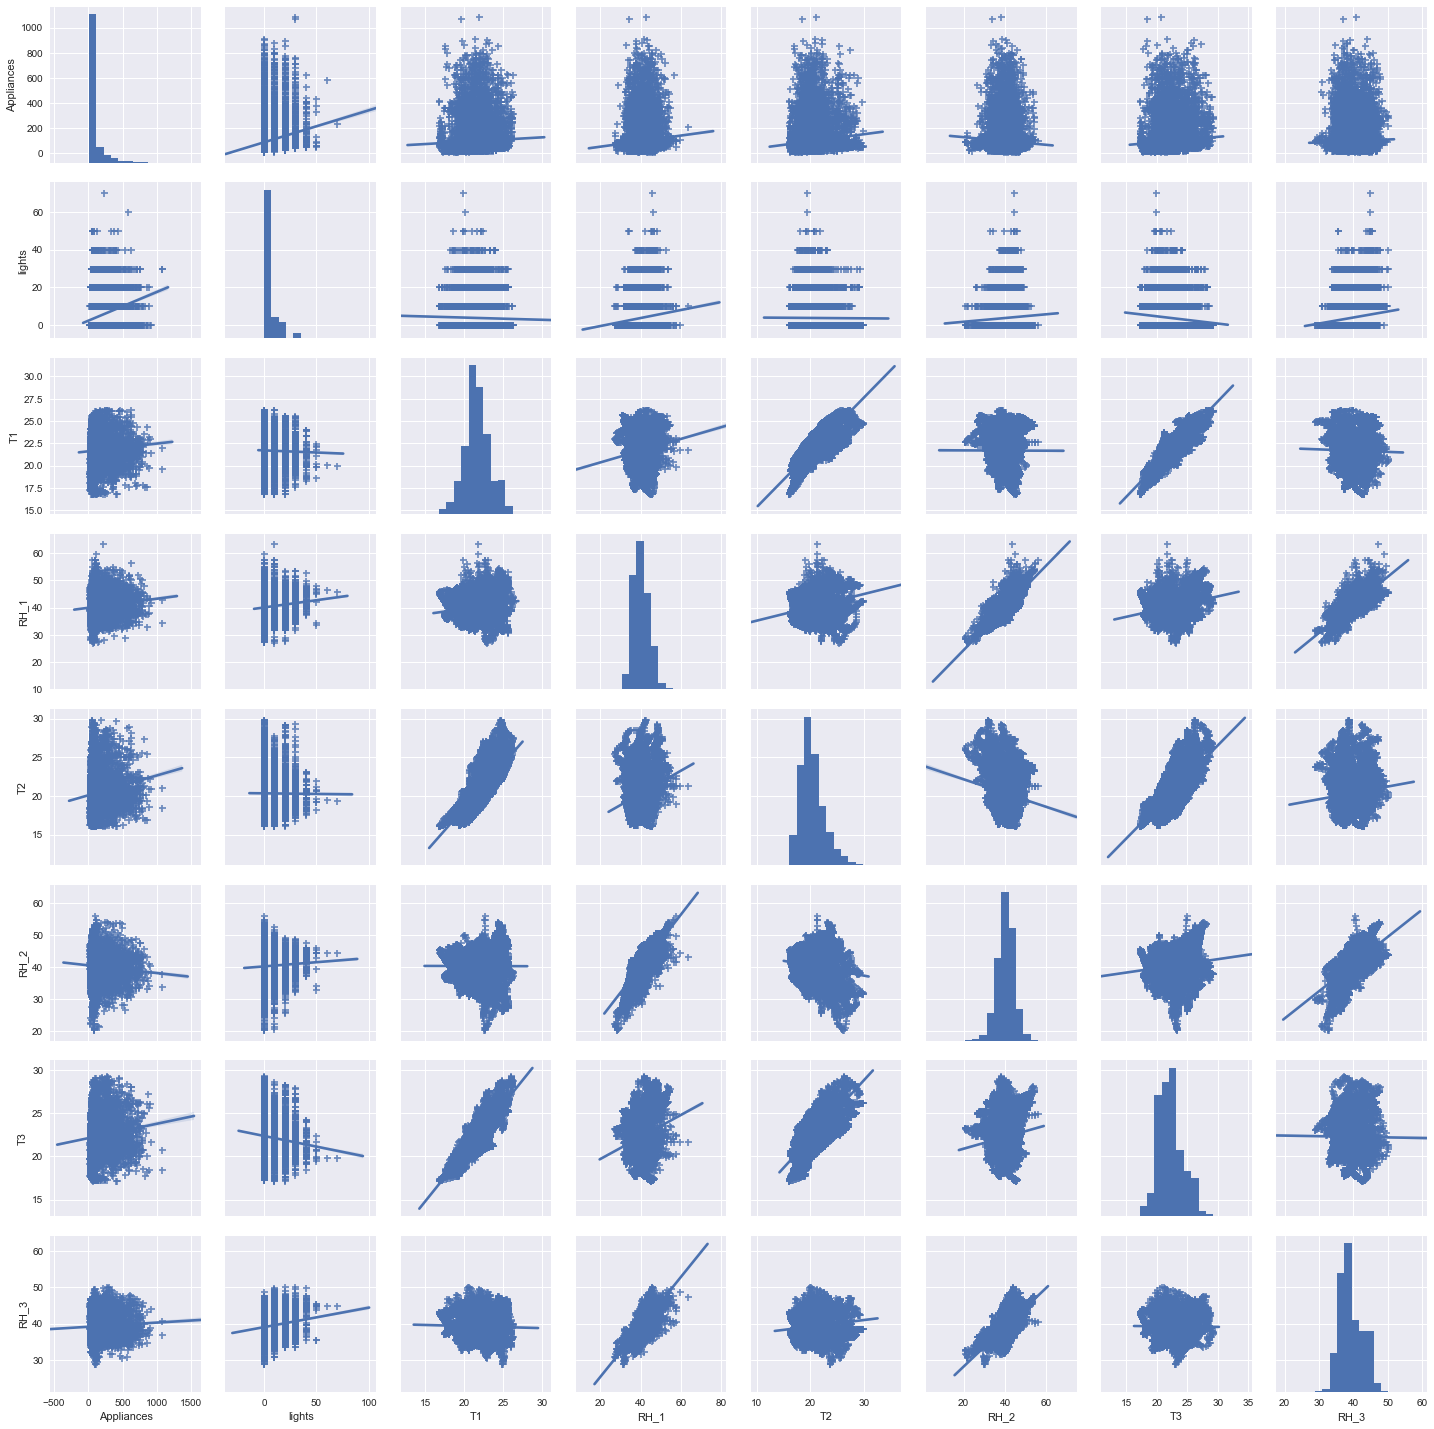

In [25]:
# scatterplot matrix for kitchen, living room, and laundry room
selected1 = energy[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
sns.pairplot(selected1, kind='reg', markers='+')

## Comments on the scatterplot matrix

There is a positive linear relationship between:

   * kitchen (T1) & living room (T2) temperature
   * kitchen (T1) & laundry room (T3) temperature
   * living room (T2) & laundry room (T3) temperature.
   
Similar trend can be obseved between room humidity in different rooms.


C:\Users\renat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\renat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


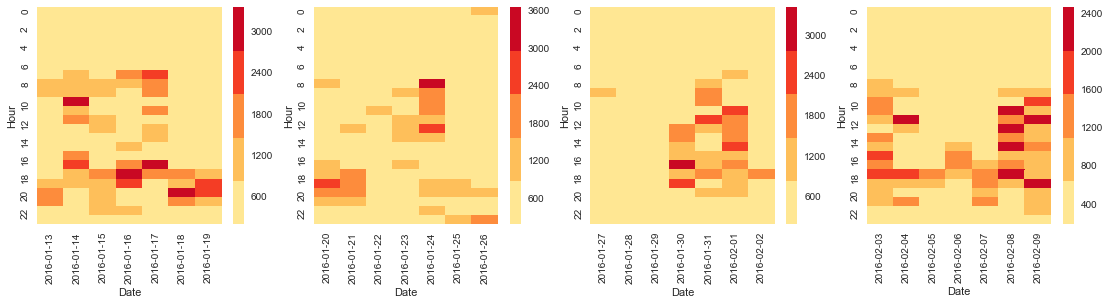

In [26]:
# creation of heatmaps
energy_heatmap = energy[['Appliances']] # take out Appliances and index column
energy_heatmap['Hour'] = energy_heatmap.apply(lambda x: x.name.hour, axis=1) # get hour from index
energy_heatmap['Date'] = energy_heatmap.apply(lambda x: x.name.strftime("%Y-%m-%d"), axis=1) # get date from index
energy_heatmap = energy_heatmap.reset_index(drop=True).groupby(['Date', 'Hour']).sum().reset_index() # drop index, groupby date & hour, then get sum of these values, then reset origianl index
                                                                                                    
fig, axs = plt.subplots(figsize=(19,4), nrows=1, ncols=4) # set multiple heatmaps next to each other

start_datetime = np.datetime64('2016-01-12 00:00:00')
end_datetime = start_datetime + np.timedelta64(7, 'D')

# iterate through 4 weeks worth of data
for i, (ax) in enumerate(axs.flatten()):
    sns.heatmap(data=energy_heatmap.query('Date > "' + str(start_datetime) + '" & Date <= "' + str(end_datetime) + '"').pivot('Hour','Date','Appliances'),
                cmap=sns.color_palette("YlOrRd", 5),
                ax=ax)

    start_datetime = end_datetime
    end_datetime = start_datetime + np.timedelta64(7, 'D')

plt.show()


## Comments on heatmaps

* Energy consumption increases in the afternoons and evenings.
* Energy consumption has a different pattern in the four consecutive weeks.
* Majority of the time, energy consumption is between 600 and 1200 Wh. (light yellow colours dominate heatmaps)

In [27]:
energy.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


## Comments on the correlation matrix

* Relatively strong correlation can only be observed between different room temperatures and humidity.
* However, appliances have no strong correlation with any of the variables.

In [28]:
# read train & test data
energy_train = pd.read_csv('data/energydata_training.csv', index_col='date', parse_dates=True)
energy_test = pd.read_csv('data/energydata_testing.csv', index_col='date', parse_dates=True)
energy_train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
count,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,...,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000
mean,98.011214,3.802608,21.684167,40.271439,20.342506,40.418056,22.262628,39.249149,20.855433,39.030359,...,41.542065,7.413018,755.502983,79.734122,4.034470,38.330141,3.756859,25.078087,25.078087,42985.989326
std,102.828019,7.940340,1.607780,3.981741,2.191842,4.066223,2.013785,3.252755,2.044786,4.339783,...,4.150839,5.323843,7.427684,14.955609,2.436870,11.812780,4.200297,14.481537,14.481537,24968.649028
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.893333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000
25%,50.000000,0.000000,20.730000,37.361667,18.823333,37.900000,20.790000,36.900000,19.500000,35.530000,...,38.500000,3.666667,750.866667,70.000000,2.000000,29.000000,0.900000,12.580425,12.580425,21600.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.863333,6.900000,756.100000,83.666667,3.666667,40.000000,3.450000,25.043993,25.043993,43200.000000
75%,100.000000,0.000000,22.600000,43.090000,21.500000,43.290000,23.290000,41.761667,22.100000,42.130000,...,44.363333,10.400000,760.933333,91.666667,5.500000,40.000000,6.533333,37.665907,37.665907,64800.000000
max,1080.000000,50.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.063333,...,53.326667,25.966667,772.300000,100.000000,13.500000,66.000000,15.500000,49.996530,49.996530,85800.000000


## Recursive Feature Elimination

Aim is to find the best predictors of appliances energy consumption using RFE, then evaluate the model by looking at metrics like Mean Squared Error (MSE) and R-Squared.

In [29]:
# setting up the possible predictor features and the response variable
feature_cols = np.array(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'NSM', 'Press_mm_hg'])
X = energy_train[feature_cols]
y = energy_train['Appliances']

### Selected features for the model and their coefficients

In [30]:
estimator = LinearRegression()
selector = RFE(estimator, 15) # number indicates the number features to be selected
selector = selector.fit(X,y)

# print selected features and their coefficients
supp = selector.get_support()
print(f'Selected features: {feature_cols[supp]}')
print(f'Coeffs: {selector.estimator_.coef_}')

Selected features: ['lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'T6' 'RH_7' 'T8' 'RH_8'
 'T9' 'T_out' 'Windspeed']
Coeffs: [  1.99559234  -1.97589829  15.34818746 -17.22780131 -13.5475964
  25.65608918   5.26109985  -2.82255128   6.0965107   -1.53644024
   9.52875638  -4.82977667 -16.95507268  -5.19392721   1.79648022]


### How good is the model?

In [31]:
# evaluate the model
predicted = selector.predict(X)
print(f'MSE: {mean_squared_error(y, predicted)}')
print(f'R-Squared: {r2_score(y, predicted)}')

MSE: 8803.85893624091
R-Squared: 0.16731743012776634


* R-Squared is very low, only small percentage of variation is explained by the selected features.

## Linear Regression

In [32]:
# create X & y
feature_col = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T6', 'RH_7', 'T8', 'RH_8', 'T9', 'T_out', 'Windspeed']
X = energy_train[feature_col]
y = energy_train[['Appliances']]

# fit the linear model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# evaluation of lm by looking at MSE & R-Sqaured
predicted = lm.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print(f'MSE: {mse}')
print(f'R Squared: {r2}')

MSE: 8803.85893624091
R Squared: 0.16731743012776634


## Comments on linear regression

* It is difficult to fit a good model to this data because the metric R-squared doesn't not go above 17% which is extremely low. 

## Comparison of result found in the reference paper

Almost the same results have been reproduced in this notebook, however advanced techniques haven't been applied, therefore the best model hasn't been reached.

The reproduced plots convey the same message as in the paper:

* This histogram of energy consumption of appliances is highly right skewed. 
* The boxplot of appliances shows dispersed and skewed data with many outliers.
* The line plots have the same spiky trend throughout the given time period.
* The scatterplot matrices show high correlation between different rooms.

     


## Conclusion

A good linear regression cannot be fitted to this data. The correlation between appliances and the other variables are not strong enough, therefore the regression will not be useful in predicting the energy consumtion of appliances. Instead, usage of more advanced modelling methods is recommended.

# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [34]:
import numpy as np 
import pandas as pd 
from copy import deepcopy
from matplotlib import pyplot as plt
%matplotlib inline

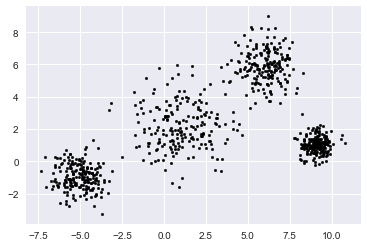

In [35]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

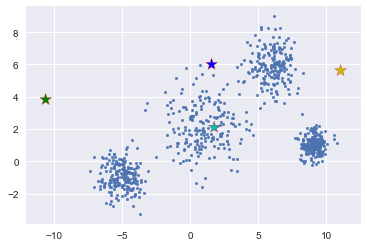

In [36]:
# set number of clusters
k = 4

# Number of training data
n = data.shape[0]

# Number of features in the data
c = data.shape[1]

# generate random ceters
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centroids = np.random.randn(k,c)*std + mean

# scatter plot with the four centroids
plt.scatter(data[:,0], data[:,1], s=7)
colors=['g','b','y','c']
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c=colors, s=150, edgecolor='r')

## 2. Visualise the clustering results in each iteration

### Explanation of K-means algorithm

K-means is a clustering method where the following steps are done:

1. K number of random centroids are selected for our data.
2. The euclidian distance is calculated between each data point and each centroid. 
3. Data points are assigned to the closest centroid, hence forming k number of clusters.
4. New centroids are calculated by taking the mean of all data points in each cluster.
5. Step 3 and step 4 are repeated until the change in the newly assigned centroids is small or does not change, thereby forming k number of clusters with centroids.



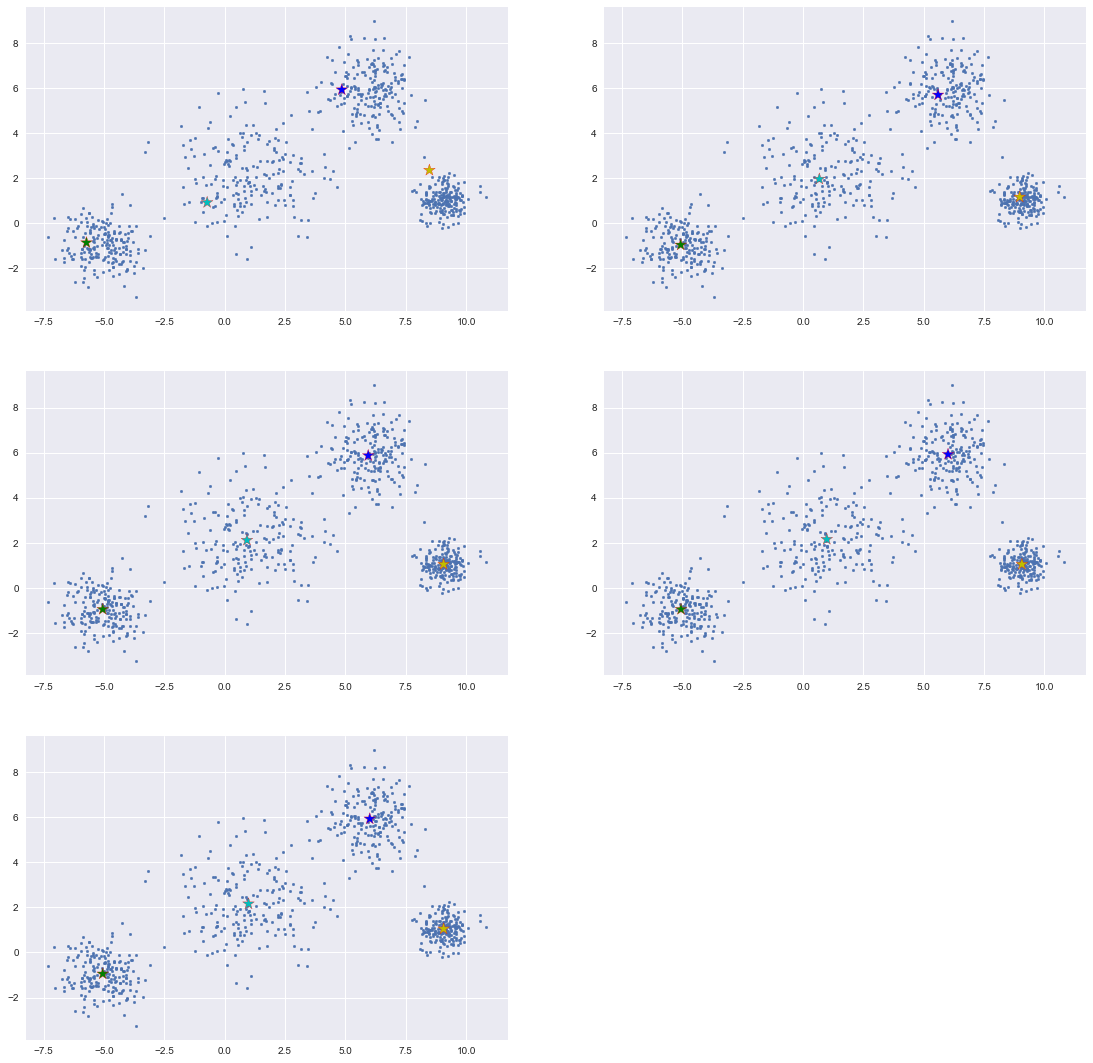

In [37]:
# keep track of old and new centroids
centroids_old = np.zeros(centroids.shape) 
centroids_new = deepcopy(centroids)

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centroids_new - centroids_old)

fig = plt.figure(figsize=(19,19))
plot_count = 321

while error != 0:
    # Measure the distance to every centroids
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centroids_new[i], axis=1)
    # Assign all training data to closest centroids
    clusters = np.argmin(distances, axis = 1)
    
    centroids_old = deepcopy(centroids_new)
    # Calculate mean for every cluster and update the centroid
    for i in range(k):
        centroids_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centroids_new - centroids_old)
    
    # scatter plot with updated centroids
    ax = fig.add_subplot(plot_count)
    ax.scatter(data[:,0], data[:,1], s=7)
    ax.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c=colors, s=150, edgecolor='r')
    plot_count += 1   
